In [1]:
# import libraries


import pandas as pd

nydf = pd.read_csv (r'C:\Users\giorg\OneDrive\Υπολογιστής\MSc_Data_Science_&_CI\Machine Learning\Coursework\Dataset\AB_NYC_2019.csv')


# Data exploring

In [3]:
pd.options.display.max_columns=30

In [4]:
nydf.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [5]:
nydf.shape

(48895, 16)

In [6]:
#we can get the missing values (if a column doesn't have 48895 entires means that has missing values)

nydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# any entry with 'True' is a missing value

nydf.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [8]:
nydf_missing = nydf.isna()

In [9]:
#Percentage of missing values in each column

nydf_missing.mean().round(4) * 100

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

# Data cleaning

In [11]:
# according to the dataset the Rooms with 0 'number_of_reviews' had as null the columns 'last_review' & 'review_per_month'
# so I replaced them as also 0, because we might need them in our analysis

nydf['last_review']=nydf['last_review'].fillna(0)
nydf['reviews_per_month']=nydf['reviews_per_month'].fillna(0)


In [12]:
nydf_missing = nydf.isna()

In [13]:
# only a small percentage of null values exists in 'name' and in 'host_name'

nydf_missing.mean().round(4) * 100

id                                0.00
name                              0.03
host_id                           0.00
host_name                         0.04
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       0.00
reviews_per_month                 0.00
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

In [14]:
#replacing the 'name' column according to what actually is

nydf.rename(columns={'name': 'room info'}, inplace=True)

In [15]:
nydf.head(3)

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365


In [16]:
#I used Excell to filter the rows with the blanks names so as to check if we can find another another entry with the same 'host_id'
#so as to replace the blank names but it seems that there is no way we can replace the missing values in 'host_name'

nydf[nydf.host_id == 228750026]

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38992,30468335,LARGE Prospect Lefferts Gardens Bedroom,228750026,NaN,Brooklyn,Flatbush,40.65152,-73.95271,Private room,55,7,0,0,0.0,1,69


In [17]:
# No duplicates in our dataset

nydf.duplicated().sum()


0

# Encoding categorical values

In [19]:
#in order to flag 'room type' and 'neighbourhood' into numbers to use for regression I had to change the type into category

cols = ['room_type', 'neighbourhood_group']
nydf[cols] = nydf[cols].astype('category')

In [20]:
# Entire home = 0, private room = 1, shared room = 2

nydf["room_type"] = nydf["room_type"].cat.codes
nydf.head(5)

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0,80,10,9,19/11/2018,0.10,1,0


In [21]:
# Bronx = 0, Brooklyn = 1, Manhatan = 2, Queens = 3, Staten Island = 4

nydf["neighbourhood_group"] = nydf["neighbourhood_group"].cat.codes
nydf.head()

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,Midtown,40.75362,-73.98377,0,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,Harlem,40.80902,-73.94190,1,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,East Harlem,40.79851,-73.94399,0,80,10,9,19/11/2018,0.10,1,0


In [22]:
nydf.isnull().sum()

id                                 0
room info                         16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [23]:
nydf.shape

(48895, 16)

In [24]:
nydf.drop(nydf[nydf['price']==0].index, inplace=True)

In [25]:
nydf.shape

(48884, 16)

In [26]:
# I will just drop the null values

nydf = nydf.dropna()

In [27]:
nydf.isnull().sum()

id                                0
room info                         0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Data insights

Index(['id', 'room info', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

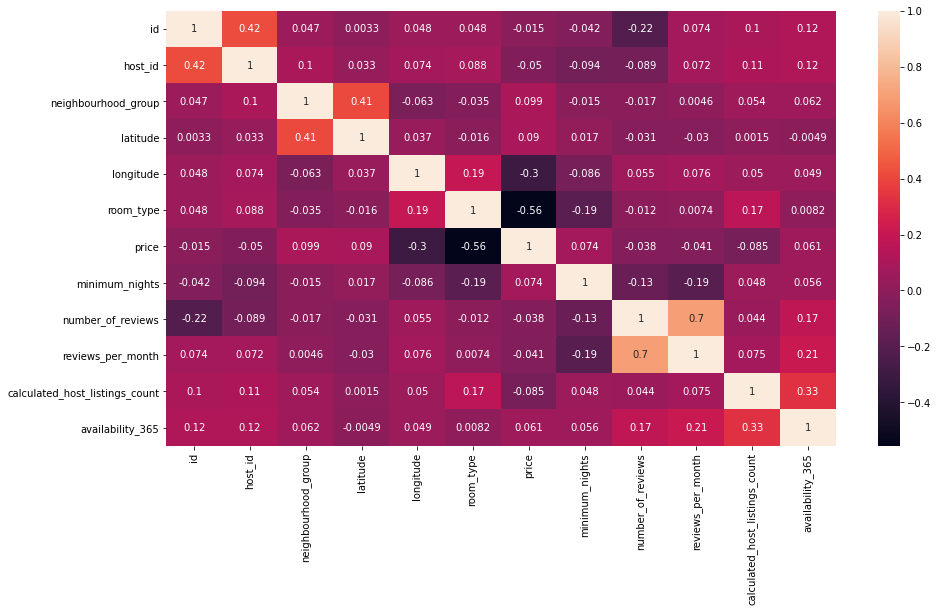

In [29]:
# correlation between variables

import matplotlib.pyplot as plt
import seaborn as sns

corr = nydf.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
nydf.columns

Text(0.5, 1.0, 'Room type')

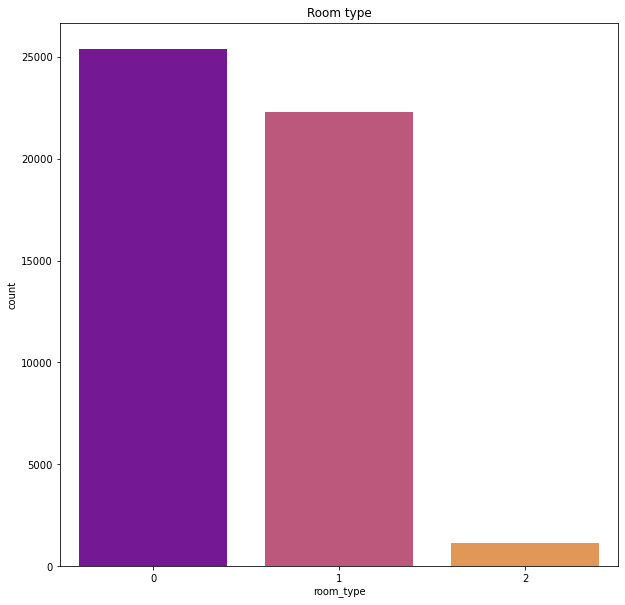

In [30]:
# Room type distribution

sns.countplot(nydf['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room type')

Text(0.5, 1.0, 'Neighborhood group')

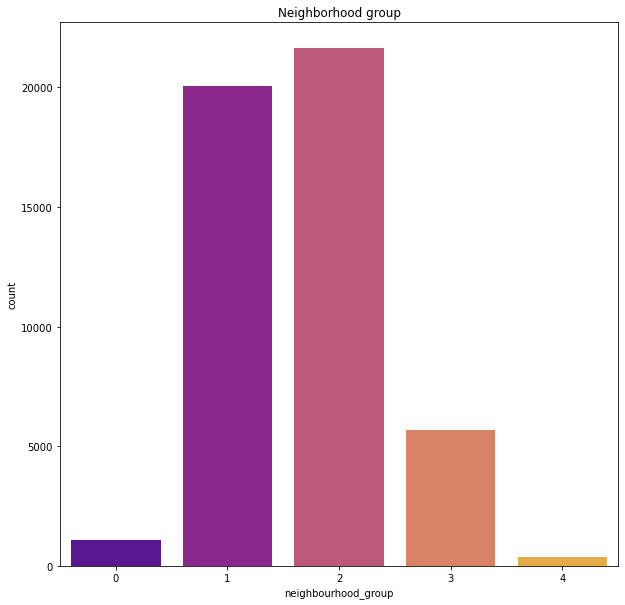

In [31]:
# Neighbourhood distribution

sns.countplot(nydf['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighborhood group')

# Clustering

In [32]:
############
#K-Means   #
############

In [33]:
nydfk = nydf[['neighbourhood_group','latitude','longitude',
          'room_type','minimum_nights','number_of_reviews','reviews_per_month',
          'calculated_host_listings_count','availability_365','price']]


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [35]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(nydfk)

In [36]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [37]:
pca.explained_variance_ratio_

array([0.17732812, 0.15019077, 0.13378655, 0.11628946, 0.08793148,
       0.08612879, 0.07662066, 0.07055278, 0.06127581, 0.03989559])

Text(0, 0.5, 'Culmulative Explained Variance')

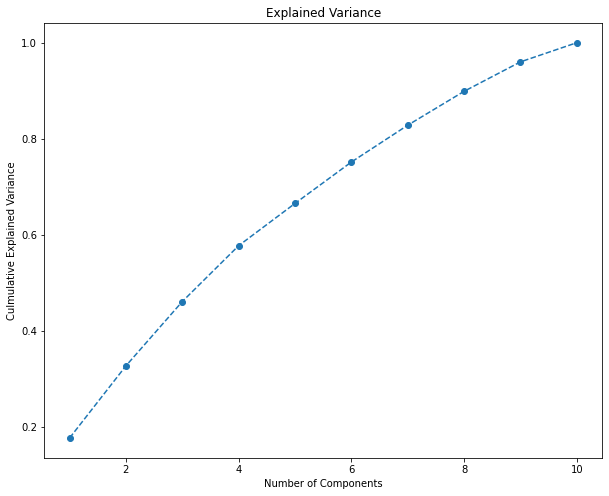

In [38]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Culmulative Explained Variance')

In [39]:
pca = PCA(n_components = 6)
pca.fit(scaled_df)

PCA(n_components=6)

In [40]:
pca.transform(scaled_df)

array([[-0.11187574, -0.10902139,  1.05488965,  1.8548129 , -0.18079594,
        -1.25119365],
       [ 0.0504332 ,  1.48193902,  0.06635503, -0.23459813, -0.06264246,
        -0.34961238],
       [ 0.05494085,  0.52415618, -1.73708491,  0.60478475,  0.01288258,
        -0.72210531],
       ...,
       [-0.92905696,  0.07381393, -1.17658393, -1.10452522,  0.18582296,
         0.65093731],
       [-0.40562886, -1.54266845, -1.22520382,  0.47465967, -0.91779984,
         0.50063667],
       [-0.80070444, -0.70213526, -0.80284826, -0.21453839, -0.39580816,
         0.66198899]])

In [41]:
scores_pca = pca.transform(scaled_df)

In [42]:

wcss = []

for i in range(1,14):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

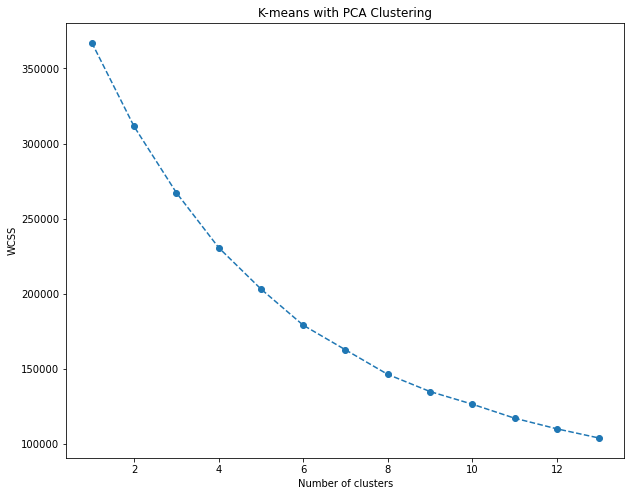

In [43]:
plt.figure(figsize = (10,8))
plt.plot(range(1,14),wcss,marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [45]:

#silhouette_scores = [] 

#for n_cluster in range(2, 10):
  #  silhouette_scores.append( 
   #     silhouette_score(scaled_df, KMeans(n_clusters = n_cluster).fit_predict(scaled_df))) 
    
# Plotting a bar graph to compare the results 
#k = [2, 3, 4, 5, 6,7,8,9] 
#plt.bar(k, silhouette_scores) 
#plt.xlabel('Number of clusters', fontsize = 10) 
#plt.ylabel('Silhouette Score', fontsize = 10) 
#plt.show() 

In [70]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [71]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [72]:
scaled_df_kmeans = pd.concat([nydfk.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
scaled_df_kmeans.columns.values[-6: ] = ['Component 1','Component 2','Component 3',
                                          'Component 4','Component 5','Component 6'
                                          ]
scaled_df_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [73]:
scaled_df_kmeans['Segment'] = scaled_df_kmeans['Segment K-means PCA'].map ({
    0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'})
    


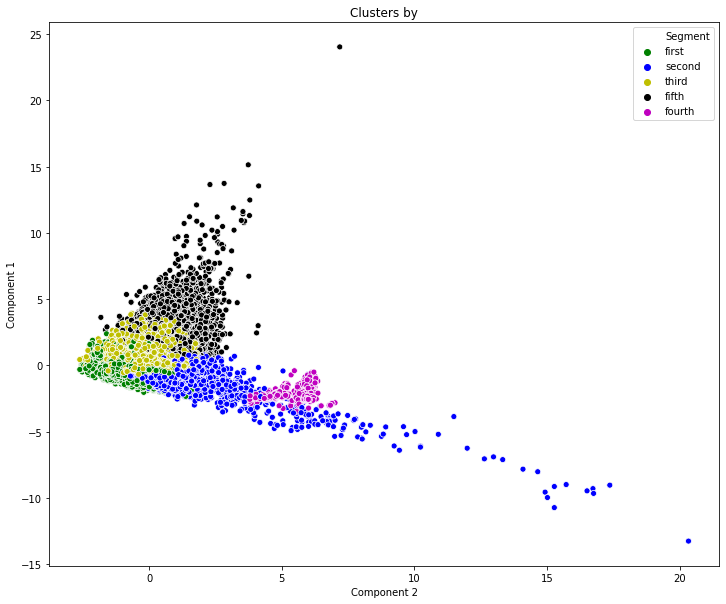

In [74]:
from sklearn.cluster import KMeans

x_axis = scaled_df_kmeans['Component 2']
y_axis = scaled_df_kmeans['Component 1']
plt.figure(figsize=(12,10))
sns.scatterplot(x_axis,y_axis, hue = scaled_df_kmeans['Segment'], palette = ['g','b', 'y','k','m'])



plt.title('Clusters by')
plt.show()



In [ ]:
# already been done

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_principal['P1'].min() - 1, X_principal['P1'].max() + 1
y_min, y_max = X_principal['P2'].min() - 1, X_principal['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(X_principal['P1'], X_principal['P2'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white circle')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()